# KNearestNeighbors
* K近傍法は教師あり学習の手法の1つ。
* Kmeansと名前は似ているが、異なる手法。（KmとKnが似ているだけ）
* アルゴリズムは下記。
    * クラス分類のされた教師データN個があるとする。
    * ある1点のデータAが与えられ、そのクラスを判別するタスクを考える。
    * N個の教師データとAを比べて、Aと近いデータを順にK個取り出す。
    * 取り出したK個のデータが属しているクラスのうち、最も多いクラスをAに振り分ける。

# データの作成
* 9点の教師データを作成する

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

X = np.array([[1,1],[1,2],[2,1],
             [4,1],[5,1],[4,2],
             [2,5],[2,6],[3,6]])

y = [0,0,0,1,1,1,2,2,2]

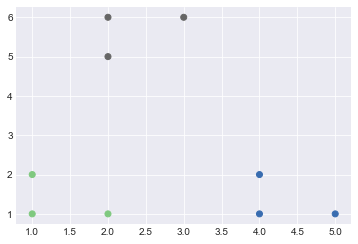

In [2]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='Accent')

* 今回クラスを推定したいデータAを作る

In [3]:
A = np.array([[2.75,1.5]]) 

In [4]:
A.shape

(1, 2)

* Aはn×2のベクトルとして与える必要がある。今回はn=1。
* 教師データと推定したいAを図示すると下記。

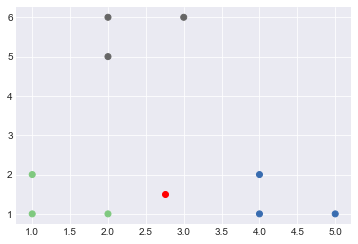

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='Accent')
plt.scatter(A[:,0],A[:,1],c="red",cmap='Accent')

* 赤い点がAで、このAのクラスを推定したい。

# 推定

* KNeighborsClassifierでできる。
* n_neighbors が、クラス推定に用いる個数（上の説明だとK)

In [6]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
pred = neigh.predict(A)
pred

array([0])

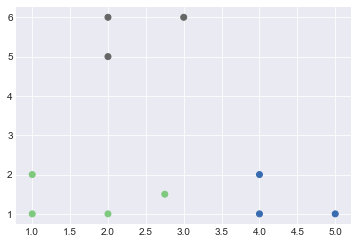

In [8]:
X_A = np.concatenate([X,A])
y_A = np.concatenate([y,pred])

plt.scatter(X_A[:,0],X_A[:,1],c=y_A,cmap='Accent')

* n_neighbors(K)が1だと、Aは緑色と推定された。
* 最も近い点と同じクラスになった。

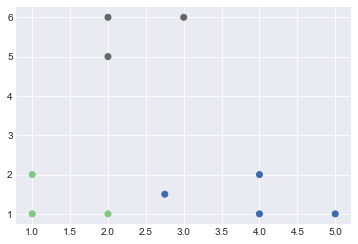

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X,y)

pred = neigh.predict(A)
pred

X_A = np.concatenate([X,A])
y_A = np.concatenate([y,pred])

plt.scatter(X_A[:,0],X_A[:,1],c=y_A,cmap='Accent')

* n_neighborsが3だと、Aは青色と推定。
* 最も近い3つを取り出すと、緑が1つ、青が2つ取り出されるため、個数の多い青と推定されている。

* Kの数はハイパーパラメータなので、最も良いKを決める必要がある。決める際には教師データをTrainとValidに分けて色々なKを試して精度を比べる。